In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
%run Flightprice_alg_investigation.ipynb
from sklearn.model_selection import learning_curve

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
def grid_search_hyper_params(X_train, y_train):
    
    # defining parameter range 
    m = len(X_train)
    
    param_grid = {'alpha': [0.1/m, 1/m, 10/m, 100/m],  
                  'eta0': [1, 0.1, 0.01, 0.001, 0.0001], 
                  'penalty':['l2'],
                  'random_state': [42],
                  'max_iter':[200]}  

    print("Training ...")
    grid = GridSearchCV(SGDRegressor(), 
                        param_grid, 
                        return_train_score = True,
                        refit = True, 
                        verbose = 3,
                        n_jobs=1, 
                        cv = 3) 

    # fitting the model for grid search 
    grid.fit(X_train, y_train) 

    #print(grid.cv_results_)
    # print best parameters after tuning 
    print("Grid searching is done!")
    print("The best score: ", grid.best_score_)
    print("The best hyperparameters:")
    print(grid.best_params_)
    return grid


def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), title='Learning Curve'):
   
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [59]:

def main():
    

    # Grid search for the best hyperparameters
    final_model = grid_search_hyper_params(Xtrain_prepared, ytrain_prepared)
    
    # Plot learning curve
    
    plot_learning_curve(final_model, Xtrain_prepared, ytrain_prepared)
    
    # Evaluate the final model on the development set
    dev_predictions = final_model.predict(Xdev_prepared)
    dev_rmse = mean_squared_error(ydev_prepared, dev_predictions, squared=False)
    
    # Evaluate the final model on the test set
    test_predictions = final_model.predict(Xtest_prepared)
    test_rmse = mean_squared_error(ytest_prepared, test_predictions, squared=False)
    
    print("Development RMSE: ", dev_rmse)
    print("Test RMSE: ", test_rmse)
    # Assuming `ytest_prepared.mean()` gives the mean of the target variable in the test set
    print("Error rate (%): ", 100 * test_rmse / np.mean(ytest_prepared))


Training ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.996, test=0.995) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.996, test=0.996) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.996, test=0.996) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.713, test=0.703) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.703, test=0.710) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.698, test=0.694) total time=   0.3s
[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.996, test=0.995) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.996, test=0.996) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.996, test=0.996) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.713, test=0.703) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.703, test=0.710) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.698, test=0.694) total time=   0.3s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.4s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.4s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.4s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.996, test=0.995) total time=   0.4s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.995, test=0.996) total time=   0.4s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.995, test=0.995) total time=   0.5s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.712, test=0.702) total time=   0.4s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.702, test=0.709) total time=   0.4s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.697, test=0.693) total time=   0.5s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.989) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.993) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.992) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.987) total time=   0.5s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.988) total time=   0.5s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.988) total time=   0.5s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.703, test=0.693) total time=   0.5s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.693, test=0.700) total time=   0.5s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.688, test=0.683) total time=   0.5s
Grid searching is done!
The best score:  0.9998628894535688
The best hyperparameters:
{'alpha': 1.9774569903104608e-05, 'eta0': 1, 'max_iter': 200, 'penalty': 'l2', 'random_state': 42}
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.987) total time=   0.1s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.998) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.919, test=0.574) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before c

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.998, test=0.996) total time=   0.1s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.996) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.998, test=0.997) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.878, test=0.843) total time=   0.1s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.841, test=0.784) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.865, test=0.873) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-0.719, test=-0.792) total time=   0.1s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-0.861, test=-0.945) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-0.867, test=-0.846) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.998, test=0.997) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.953) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.985, test=0.920) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.998, test=0.996) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.996) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.998, test=0.997) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.878, test=0.843) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.841, test=0.784) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.865, test=0.873) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-0.719, test=-0.792) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-0.861, test=-0.945) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-0.867, test=-0.846) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.998) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.998, test=0.996) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.995) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.998, test=0.996) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.877, test=0.842) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.840, test=0.782) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.864, test=0.872) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-0.720, test=-0.793) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-0.862, test=-0.946) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-0.868, test=-0.847) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.991) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.989) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.992) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.990) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.987) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.987) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.982) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.988) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.867, test=0.832) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.829, test=0.769) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.852, test=0.861) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-0.726, test=-0.799) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-0.868, test=-0.951) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-0.874, test=-0.853) total time=   0.1s
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.998) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.975, test=0.973) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.972, test=0.971) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.980, test=0.974) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.219, test=0.219) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.223, test=0.163) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.283, test=0.301) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before c

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.998) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.975, test=0.973) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.972, test=0.971) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.980, test=0.974) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.219, test=0.218) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.223, test=0.163) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.283, test=0.301) total time=   0.1s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.998) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.998) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.1s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.974, test=0.972) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.971, test=0.969) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.979, test=0.973) total time=   0.1s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.218, test=0.218) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.223, test=0.163) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.283, test=0.301) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.988) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.990) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.990) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.992) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) to

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.989) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.962, test=0.960) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.960, test=0.955) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.970, test=0.964) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.212, test=0.212) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.217, test=0.156) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.277, test=0.296) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.987) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.987) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.990) total time=   0.2s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.447, test=0.427) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.491, test=0.478) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.446, test=0.453) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.987) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.987) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.990) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.447, test=0.427) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.491, test=0.478) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.446, test=0.453) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.987) total time=   0.2s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.987) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.989) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.446, test=0.426) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.490, test=0.478) total time=   0.2s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.446, test=0.453) total time=   0.2s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.991) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.992) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.990) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.979, test=0.977) total time=   0.2s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.982, test=0.980) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.980, test=0.981) total time=   0.2s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.441, test=0.420) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.485, test=0.474) total time=   0.2s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.440, test=0.447) total time=   0.2s
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.991) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.993) total time=   0.2s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.588, test=0.582) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.594, test=0.607) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.573, test=0.548) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.991) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.994) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.588, test=0.582) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.594, test=0.607) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.573, test=0.548) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.2s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.991) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.993) total time=   0.2s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.992) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.587, test=0.582) total time=   0.2s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.593, test=0.607) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.572, test=0.547) total time=   0.2s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.990) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.992) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.993) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992)

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.993) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.984) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.987) total time=   0.2s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.985, test=0.984) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.581, test=0.575) total time=   0.2s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.586, test=0.601) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.565, test=0.540) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.995, test=0.995) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.995, test=0.995) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.654, test=0.656) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.646, test=0.637) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.658, test=0.656) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.995, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.995, test=0.995) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.654, test=0.656) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.646, test=0.637) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.658, test=0.656) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before c

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.995) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.654, test=0.656) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.645, test=0.636) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.657, test=0.655) total time=   0.2s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.990) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.990) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.992) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.993)

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.986) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.986) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.988) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.646, test=0.648) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.638, test=0.628) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.649, test=0.648) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.998, test=0.995) total time=   0.0s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.998, test=0.996) total time=   0.0s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.996) total time=   0.0s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.782, test=0.740) total time=   0.0s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.763, test=0.737) total time=   0.0s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.755, test=0.720) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.052, test=-1.405) total time=   0.0s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.188, test=-1.152) total time=   0.0s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.218, test=-1.017) total time=   0.0s
[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.998, test=0.995) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.996) total time=   0.0s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.996) total time=   0.0s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.782, test=0.740) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(t

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.755, test=0.720) total time=   0.0s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.052, test=-1.405) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.188, test=-1.153) total time=   0.0s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.218, test=-1.017) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.994) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.995) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.995) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.780, test=0.738) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.761, test=0.736) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.754, test=0.718) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.053, test=-1.406) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.188, test=-1.153) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.218, test=-1.018) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.985) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.982, test=0.982) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.976, test=0.973) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.98

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.985, test=0.980) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.984, test=0.977) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.767, test=0.724) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.748, test=0.722) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.740, test=0.705) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.060, test=-1.414) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.196, test=-1.160) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.226, test=-1.025) total time=   0.0s
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.969, test=0.959) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.964, test=0.960) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.961, test=0.962) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.189, test=0.181) total time=   0.1s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.168, test=0.121) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.114, test=0.132) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.969, test=0.959) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.963, test=0.960) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.961, test=0.961) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.189, test=0.181) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.168, test=0.121) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.114, test=0.132) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.2s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.968, test=0.958) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.962, test=0.958) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.959, test=0.960) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.189, test=0.180) total time=   0.2s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.167, test=0.120) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.113, test=0.132) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.988) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.985) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.989) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.989) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.989) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.990) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.988) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.988) total time=   0.2s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.989) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.955, test=0.945) total time=   0.2s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.949, test=0.943) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.945, test=0.945) total time=   0.2s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.183, test=0.174) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.161, test=0.115) total time=   0.2s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.107, test=0.126) total time=   0.2s
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.985) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.986) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.984, test=0.985) total time=   0.2s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.451, test=0.406) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.425, test=0.435) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.378, test=0.378) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.985) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.986) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.984, test=0.985) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.451, test=0.406) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.425, test=0.435) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.378, test=0.378) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.984) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.985) total time=   0.2s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.984, test=0.984) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.450, test=0.405) total time=   0.2s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.424, test=0.434) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.377, test=0.378) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.990) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.992) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.990)

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.990) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.990) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.979, test=0.975) total time=   0.2s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.977, test=0.976) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.973, test=0.972) total time=   0.2s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.445, test=0.401) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.418, test=0.429) total time=   0.2s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.372, test=0.371) total time=   0.1s
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.991) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.588, test=0.569) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.553, test=0.573) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.530, test=0.498) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.991) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.588, test=0.569) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.553, test=0.573) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.530, test=0.498) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.991) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.2s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.990) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.587, test=0.569) total time=   0.2s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.552, test=0.572) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.529, test=0.497) total time=   0.2s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.989) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.987) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.993) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.990) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.992) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.989) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.984) total time=   0.2s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.984, test=0.985) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.982, test=0.980) total time=   0.2s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.581, test=0.564) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.545, test=0.565) total time=   0.2s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.523, test=0.489) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.654, test=0.652) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.616, test=0.604) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.628, test=0.629) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.654, test=0.652) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.616, test=0.604) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.628, test=0.629) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before c

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.654, test=0.651) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.615, test=0.603) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.627, test=0.628) total time=   0.2s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.986) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.990) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.992) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.990) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.986) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.985, test=0.984) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.986) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.646, test=0.645) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.607, test=0.594) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.620, test=0.620) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.998, test=0.995) total time=   0.0s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.998, test=0.996) total time=   0.0s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.996) total time=   0.0s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.782, test=0.740) total time=   0.0s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.763, test=0.737) total time=   0.0s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.755, test=0.720) total time=   0.0s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, sco

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.188, test=-1.152) total time=   0.0s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.218, test=-1.017) total time=   0.0s
[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(trai

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.998, test=0.995) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.996) total time=   0.0s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.996) total time=   0.0s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.782, test=0.740) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.763, test=0.737) total time=   0.0s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.052, test=-1.405) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.188, test=-1.153) total time=   0.0s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.218, test=-1.017) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(tra

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.995) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.995) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.780, test=0.738) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.761, test=0.736) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.754, test=0.718) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.053, test=-1.406) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.188, test=-1.153) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.218, test=-1.018) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.985) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.982, test=0.982) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.976, test=0.973) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.985) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, tes

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.981) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.985, test=0.980) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.984, test=0.977) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.767, test=0.724) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.748, test=0.722) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.740, test=0.705) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.060, test=-1.414) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.196, test=-1.160) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.226, test=-1.025) total time=   0.0s
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.975, test=0.965) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.970, test=0.969) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.961, test=0.959) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.196, test=0.203) total time=   0.1s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.173, test=0.147) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.114, test=0.099) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.974, test=0.965) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.970, test=0.969) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.961, test=0.958) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.196, test=0.203) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.173, test=0.147) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.114, test=0.098) total time=   0.1s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, 

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before c

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.1s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.974, test=0.964) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.969, test=0.968) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.959, test=0.957) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.195, test=0.202) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.173, test=0.146) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.113, test=0.098) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.985) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.985) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.988) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.990) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.990) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.989) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.989) to

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.957, test=0.954) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.945, test=0.940) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.189, test=0.196) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.167, test=0.141) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.107, test=0.092) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.987) total time=   0.1s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.987) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.985) total time=   0.2s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.462, test=0.430) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.408, test=0.420) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.408, test=0.395) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.987) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.987) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.985) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.462, test=0.430) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.408, test=0.420) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.408, test=0.395) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.987) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.986) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.985, test=0.984) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.461, test=0.429) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.407, test=0.419) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.408, test=0.394) total time=   0.2s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.988) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.986) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.992) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.989) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.989) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.981, test=0.979) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.977, test=0.977) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.976, test=0.972) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.456, test=0.425) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.402, test=0.413) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.402, test=0.388) total time=   0.3s
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.4s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.4s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.4s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.4s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.4s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.993) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.2s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.595, test=0.582) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.555, test=0.560) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.538, test=0.519) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.993) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.595, test=0.582) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.555, test=0.560) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.538, test=0.519) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before c

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.2s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.594, test=0.581) total time=   0.2s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.554, test=0.559) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.537, test=0.519) total time=   0.2s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.993) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.993) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.990) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.986) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.984, test=0.982) total time=   0.2s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.983, test=0.983) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.588, test=0.576) total time=   0.2s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.547, test=0.552) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.531, test=0.510) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.995) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.656, test=0.645) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.620, test=0.613) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.635, test=0.642) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.995) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.656, test=0.645) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.620, test=0.613) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.635, test=0.642) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.655, test=0.644) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.619, test=0.612) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.634, test=0.641) total time=   0.2s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.993) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.990) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.990) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.992)

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.990) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.987) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.984) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.987) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.647, test=0.637) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.611, test=0.603) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.626, test=0.633) total time=   0.2s
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.998, test=0.995) total time=   0.0s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.998, test=0.996) total time=   0.0s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.996) total time=   0.0s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.782, test=0.740) total time=   0.0s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.763, test=0.737) total time=   0.0s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.755, test=0.720) total time=   0.0s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, sco

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.188, test=-1.152) total time=   0.0s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.218, test=-1.017) total time=   0.0s
[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(trai

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.998, test=0.995) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.996) total time=   0.0s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.996) total time=   0.0s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.782, test=0.740) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.763, test=0.737) total time=   0.0s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.052, test=-1.405) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.188, test=-1.153) total time=   0.0s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.218, test=-1.017) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(tra

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.995) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.995) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.780, test=0.738) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.761, test=0.736) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.754, test=0.718) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.053, test=-1.406) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.188, test=-1.153) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.218, test=-1.018) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.985) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.982, test=0.982) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.976, test=0.973) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.98

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.981) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.985, test=0.980) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.984, test=0.977) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.767, test=0.724) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.748, test=0.722) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.740, test=0.705) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.060, test=-1.414) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.196, test=-1.160) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.226, test=-1.025) total time=   0.0s
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.975, test=0.965) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.970, test=0.969) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.961, test=0.959) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.196, test=0.203) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.173, test=0.147) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.114, test=0.099) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.974, test=0.965) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.970, test=0.969) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.961, test=0.958) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.196, test=0.203) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.173, test=0.147) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.114, test=0.098) total time=   0.1s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.974, test=0.964) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.969, test=0.968) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.959, test=0.957) total time=   0.1s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.195, test=0.202) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.173, test=0.146) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.113, test=0.098) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.985) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.985) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.988) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.990) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.990) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.989)

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.989) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.990) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.988) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.963, test=0.953) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.957, test=0.954) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.945, test=0.940) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.189, test=0.196) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.167, test=0.141) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.107, test=0.092) total time=   0.1s
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.987) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.986) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.985) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.448, test=0.418) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.391, test=0.410) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.408, test=0.385) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.987) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.986) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.985) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.448, test=0.418) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.391, test=0.410) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.408, test=0.385) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.986) total time=   0.2s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.986) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.985, test=0.984) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.447, test=0.417) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.391, test=0.409) total time=   0.2s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.408, test=0.384) total time=   0.2s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.987) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.990) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.985) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.990) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.989) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.980, test=0.979) total time=   0.2s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.976, test=0.976) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.976, test=0.972) total time=   0.2s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.442, test=0.413) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.385, test=0.403) total time=   0.2s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.402, test=0.378) total time=   0.2s
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.990) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.582, test=0.560) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.545, test=0.532) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.534, test=0.549) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.993) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.990) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.993) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.582, test=0.560) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.544, test=0.531) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.534, test=0.549) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.992) total time=   0.2s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.990) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.581, test=0.559) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.544, test=0.531) total time=   0.2s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.534, test=0.548) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.992) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.989) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.992) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.993) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.990) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.992) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.990) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.985) total time=   0.2s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.983, test=0.980) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.983, test=0.984) total time=   0.2s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.575, test=0.554) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.537, test=0.523) total time=   0.2s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.527, test=0.541) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.995) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.645, test=0.625) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.626, test=0.624) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.617, test=0.632) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.995) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.645, test=0.625) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.626, test=0.624) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.617, test=0.631) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before c

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.644, test=0.624) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.625, test=0.623) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.617, test=0.631) total time=   0.2s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.990) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.989) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.992)

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.990) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.992) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.986) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.984) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.987) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.637, test=0.617) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.617, test=0.615) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.609, test=0.623) total time=   0.2s
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.998, 

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.998, test=0.996) total time=   0.0s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.996) total time=   0.0s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.782, test=0.740) total time=   0.0s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.763, test=0.737) total time=   0.0s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.755, test=0.720) total time=   0.0s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.052, test=-1.405) total time=   0.0s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;,

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.998, test=0.995) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.996) total time=   0.0s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.997, test=0.996) total time=   0.0s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.782, test=0.740) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.763, test=0.737) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.755, test=0.720) total time=   0.0s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.052, test=-1.405) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.188, test=-1.153) total time=   0.0s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.218, test=-1.017) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.754, test=0.718) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.053, test=-1.406) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.188, test=-1.153) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.218, test=-1.018) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.985) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.982, test=0.982) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.985, test=0.980) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.984, test=0.977) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.767, test=0.724) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.748, test=0.722) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.740, test=0.705) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=-1.060, test=-1.414) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.975, test=0.965) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.970, test=0.969) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.961, test=0.959) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.196, test=0.203) total time=   0.1s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.173, test=0.147) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.114, test=0.099) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.974, test=0.965) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.970, test=0.969) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.961, test=0.958) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.196, test=0.203) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.173, test=0.147) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.114, test=0.098) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before c

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.974, test=0.964) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.969, test=0.968) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.959, test=0.957) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.195, test=0.202) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.173, test=0.146) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.113, test=0.098) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.985) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.985) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.988) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.990) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.990) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.989)

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before c

[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.963, test=0.953) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.957, test=0.954) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.945, test=0.940) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.189, test=0.196) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.167, test=0.141) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.107, test=0.092) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.987) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.986) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.985) total time=   0.2s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.448, test=0.418) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.391, test=0.410) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.408, test=0.385) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.987) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.986) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.985) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.448, test=0.418) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.391, test=0.410) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.408, test=0.385) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.0s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.1s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.986) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.986) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.985, test=0.984) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.447, test=0.417) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.391, test=0.409) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.408, test=0.384) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.989, test=0.987) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.990) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.985) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.989) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.990) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.990, test=0.989) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.980, test=0.979) total time=   0.2s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.976, test=0.976) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.976, test=0.972) total time=   0.2s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.442, test=0.413) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.385, test=0.403) total time=   0.2s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.402, test=0.378) total time=   0.1s
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.992) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.990) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.993) total time=   0.2s
[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.572, test=0.551) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.534, test=0.518) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.534, test=0.552) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.992) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.990) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.572, test=0.551) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.534, test=0.518) total time=   0.4s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.534, test=0.552) total time=   0.4s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.993, test=0.992) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.989) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.572, test=0.551) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.533, test=0.518) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.534, test=0.551) total time=   0.3s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.988, test=0.986) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.990) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) total time=   0.1s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.0s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.990) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.992) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.989) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.992) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.985, test=0.985) total time=   0.2s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.983, test=0.979) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.983, test=0.985) total time=   0.2s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.565, test=0.546) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.527, test=0.510) total time=   0.2s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.527, test=0.544) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.995, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.659, test=0.647) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.641, test=0.648) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=1.9774569903104608e-05, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.617, test=0.609) total time=   0.2s
[CV 1/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END alpha=0.00019774569903104609, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 1/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 3/3] END alpha=0.00019774569903104609, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.995, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.00019774569903104609, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.659, test=0.647) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.641, test=0.648) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=0.00019774569903104609, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.617, test=0.609) total time=   0.2s
[CV 1/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.0s
[CV 3/3] END alpha=0.0019774569903104606, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 1/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test=0.999) total time=   0.1s
[CV 3/3] END alpha=0.0019774569903104606, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=1.000, test

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before c

[CV 1/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=1.000) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.999, test=0.999) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.993) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.0019774569903104606, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.658, test=0.646) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.640, test=0.647) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[CV 3/3] END alpha=0.0019774569903104606, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.617, test=0.608) total time=   0.2s
[CV 1/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.1s
[CV 2/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.994, test=0.994) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[CV 1/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.0s
[CV 2/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.991) total time=   0.0s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.1, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) total time=   0.0s
[CV 1/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.992, test=0.992) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) total time=   0.1s
[CV 3/3] END alpha=0.019774569903104607, eta0=0.01, max_iter=200, penalty=l2, random_state=42;, score=(train=0.991, test=0.991) total time=   0.1s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.987) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.987, test=0.986) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.986, test=0.986) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.651, test=0.640) total time=   0.3s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.632, test=0.640) total time=   0.2s


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END alpha=0.019774569903104607, eta0=0.0001, max_iter=200, penalty=l2, random_state=42;, score=(train=0.609, test=0.598) total time=   0.2s
Development RMSE:  73.39594797994012
Test RMSE:  71.59546161563541
Error rate (%):  17.059776053760622


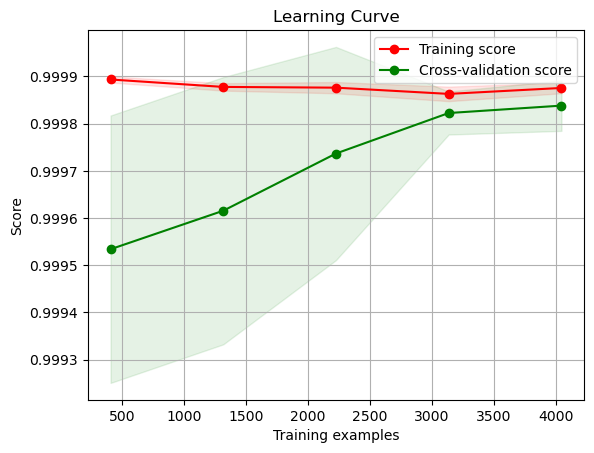

In [60]:
main()

In [ ]:
# The best hyperparameters are {'alpha': 1.9774569903104608e-05, 
# 'eta0': 1, 'max_iter': 2500, 'penalty': 'l2', 'random_state': 42}
# The error rate is 17.06%. The training and cross validation score converge 
# at the sample size around 4000, so more data would not help much. Instead we should 
# improve on algorithm, or process columns that we drop due to complex format